## 비트코인 데이터 2018-2022
비트코인 탐구: 가격, 감정, 진화 2018-2022

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/home/leejieun/workspace/kaggle-notebooks/datasets/shubham2703/bitcoin-time-series-datajan-2018-jan-2022/Bitcoin Data/Data/btc_3m.csv')

In [4]:
df.head()

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13666.11,13680.00,6.303815
1,2018-01-01 05:33:00,13679.98,13679.98,13554.44,13568.00,33.709206
2,2018-01-01 05:36:00,13568.00,13575.00,13501.01,13575.00,29.645987
3,2018-01-01 05:39:00,13539.99,13575.00,13400.01,13515.26,30.696039
4,2018-01-01 05:42:00,13515.26,13568.66,13473.47,13556.15,23.260966


In [5]:
df.shape

(713017, 6)

In [6]:
df.describe()

,open,high,low,close,volume
count,713017.000000,713017.000000,713017.000000,713017.000000,713017.000000
mean,18807.323944,18831.272011,18782.884174,18807.356373,113.791132
std,17870.632088,17893.686239,17847.464655,17870.647886,153.718050
min,3160.000000,3164.870000,3156.260000,3162.070000,0.000000
25%,7134.890000,7141.140000,7128.080000,7134.960000,41.807979
50%,9532.520000,9541.530000,9522.850000,9532.590000,72.168931
75%,32660.490000,32720.780000,32601.910000,32660.420000,128.161217
max,68766.780000,69000.000000,68610.640000,68766.770000,5508.384762


In [7]:
df.tail()

,datetime,open,high,low,close,volume
713012,2022-01-31 05:18:00,37919.05,37919.05,37876.94,37891.30,30.71790
713013,2022-01-31 05:21:00,37891.30,37946.56,37870.00,37918.80,28.36942
713014,2022-01-31 05:24:00,37918.79,37948.79,37888.88,37898.01,22.34601
713015,2022-01-31 05:27:00,37898.02,37945.25,37870.00,37881.76,42.83873
713016,2022-01-31 05:30:00,37881.75,37951.07,37880.00,37919.12,55.69696


In [8]:
df.datetime = pd.to_datetime(df.datetime)

In [9]:
df.index = df.datetime
df = df.resample('D').mean() # 일간 빈도로 리샘플링

In [10]:
df_month = df.resample('M').mean() # 월간 빈도로 리샘플링

In [11]:
df_year = df.resample('A-DEC').mean() # 연간 빈도로 리샘플링

In [12]:
df_Q = df.resample('Q-DEC').mean() # 분기별 빈도로 리샘플링

In [13]:
df_month.shape

(49, 6)

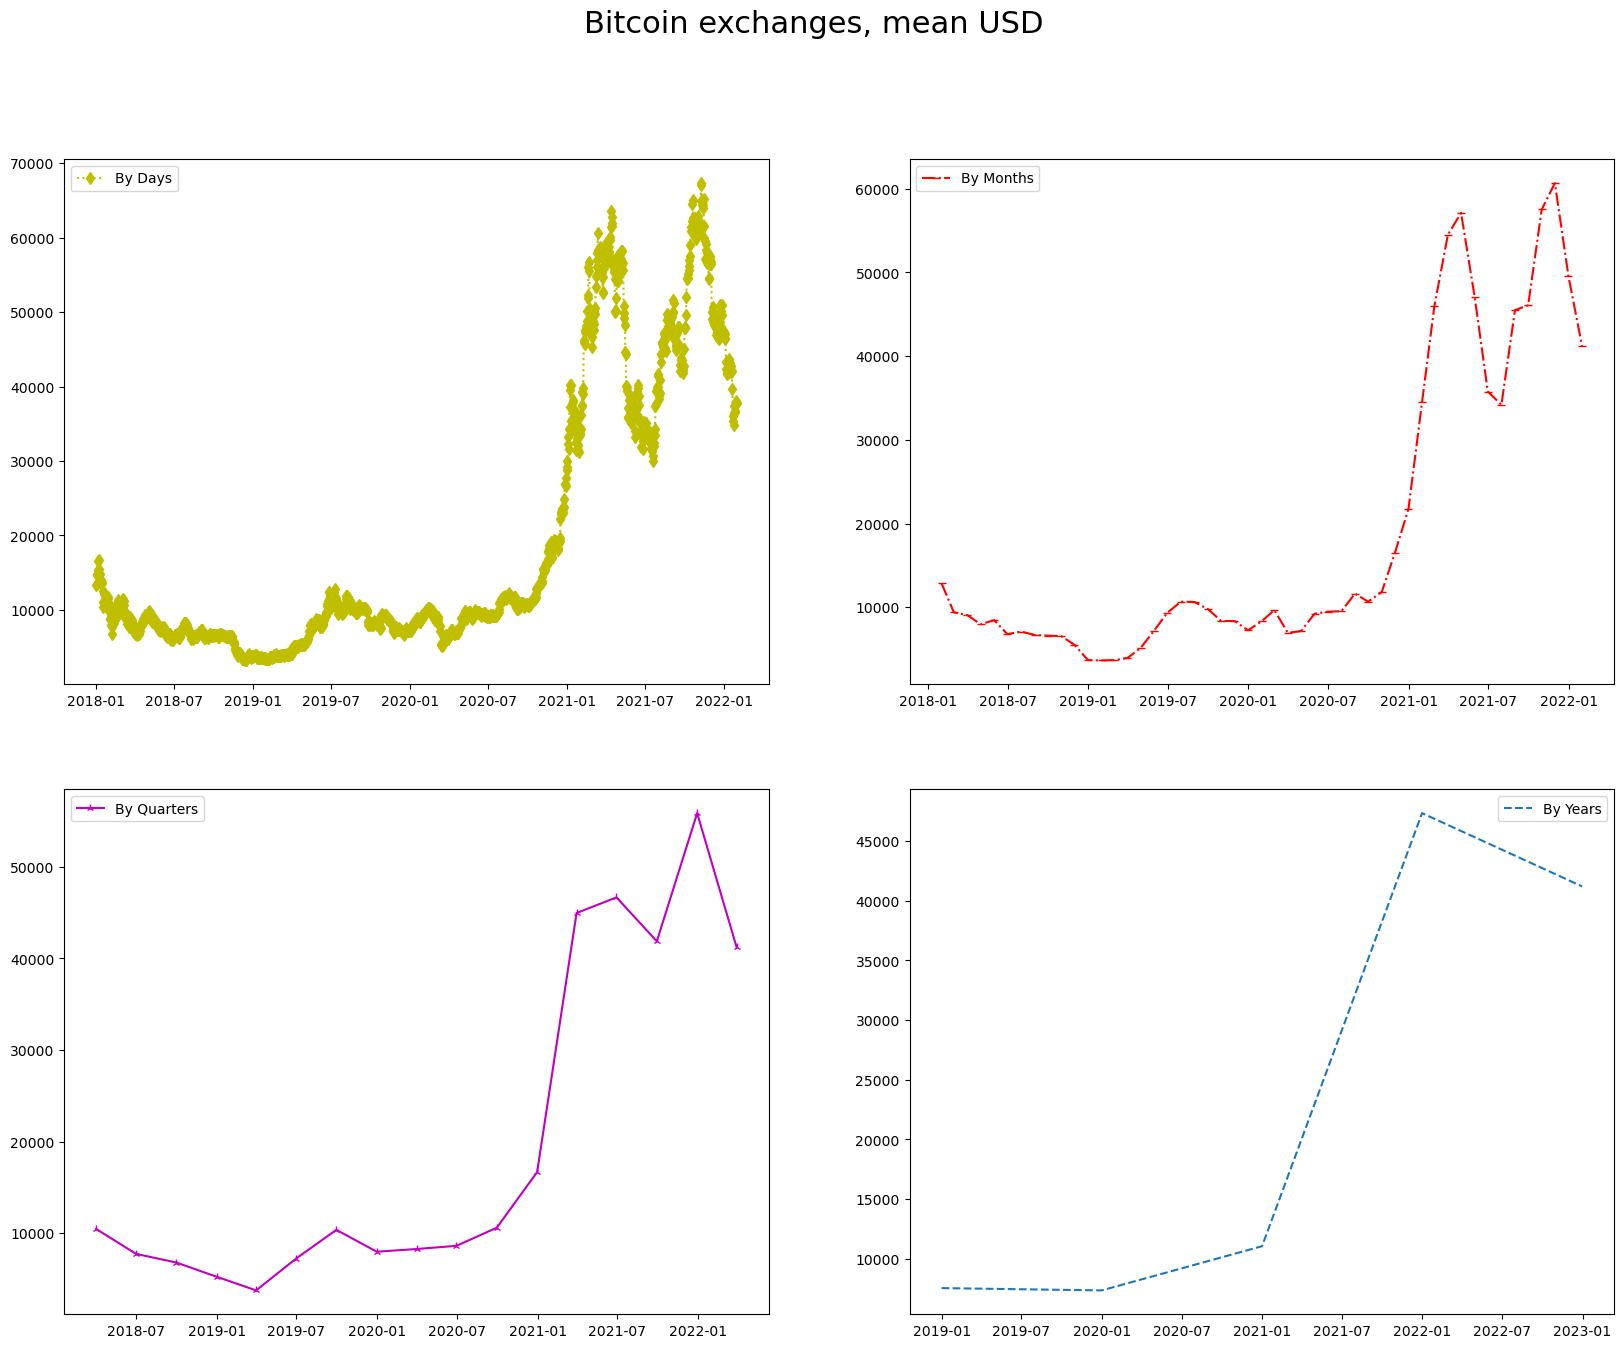

In [14]:
fig = plt.figure(figsize=[20, 15])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df.open, 'yd:', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.open, 'r_-.', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.open, 'm2-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.open, '--', label='By Years')
plt.legend()

plt.show()

Dickey-Fuller test: p=0.981313


<Figure size 1500x700 with 0 Axes>

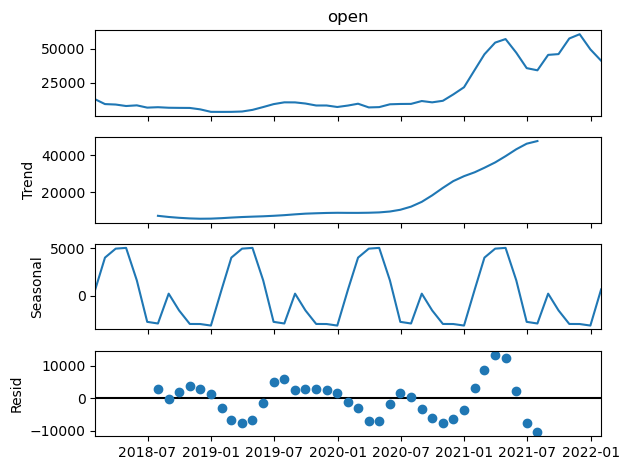

In [15]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(df_month.open).plot()
print('Dickey-Fuller test: p=%f' % sm.tsa.stattools.adfuller(df_month.open)[1])
plt.show()

In [16]:
df_month['Weighted_Price_box'], lmbda = stats.boxcox(df_month.open)
print('Dickey-Fuller test: p=%f' % sm.tsa.stattools.adfuller(df_month.open)[1])

Dickey-Fuller test: p=0.981313
